# Advanced NLP
# Lesson 1: More than words: sense2vec and ngrams

## Sense2vec: Words and syntax
Word2vec is an algorithmic approach to modelin the similarity of various words by representing each word as a vector in space.  Words that are often close to other words have vectors near one another.  However, this is a problem with homonyms, like "break" in "Give me a break" and "break" in "break a leg." Word2vec may cause the words "rest" and "divide" to seem more similar than they actually are, because their vectors are drawn together by the shared association with "break".

Sense2vec incorporates parts of speech.  In a sense2vec model, break_NOUN has a vector that is completely different than break_VERB.  To create a sense2vec model, each word in a sentence should be replaced by a string containing the word and its part of speech. After that, we apply the word2vec model-- the push-pull process and vectorization are the same, only the inputs (words vs word_pos strings) change.  They can also be used to create features and term-document matrices. Any modeling approach that typically uses words as features can also use words+POS.

## Ngrams: Words in Context
"She labored in vain; the rock would not move."
"She was so vain, her bathroom mirror was covered in lip prints."

Both "vains" are adjectives, but they have different meanings. We can tell them apart using ngrams.  Ngrams incorporate context information be creating features made up of a series of consecutive words.

A 2gram representation of sentence 1 would be:

She labored / labored in/ in vain/ vain the/ the rock/ rock would/ would not/ not move.

A 3-gram representation of sentence 2 would be:

She was so/ was so vain/ so vain her/ vain her bathroom/ her bathroom mirror/ bathroom mirror was/ mirror was covered/ was covered in/ covered in lip/ in lip prints.

Each word set could operate as its own feature.  Ngrams can be used to create term-document matrices (now ngram document matricies) or used in topic modeling.  Ngrams are also useful in text prediction.

For a sentence with X words, there will be X-(N-1) Ngrams. 2-gram phrases are also called ‘bigrams,’ 3-gram phrases are called ‘trigrams,’ etc.

## Why use words alone?

Models based on single words (as opposed to ngrams or word+POS) have several advantages.

Single-word models don't require pre0existing knowledge of the syntax or structure of the language being modeled.  We can model Afrikaans without having to create a POS-tagging system from scratch.

Ngram models are considerably more sparse than single-word models.  While this means that an ngram model can be stored in a more memory-efficient way, we need a larger corpus to detect shared patterns across documents before getting good results.

Single-word models are straightforward to implement.  Which to choose depends on the goals of the NLP project and the trade-offs in time and performance for the specific corpus you are modeling.

# Lesson 2: Text summarization
## Summarizing text
One of the goals of the summary method of topic extraction is to represent the information in text in a more concise way. There are NLP techniques that are intended specifically for summarization. Text summarization techniques fall into two categories: Extractive, and abstractive. 

## Extractive text summarization
This technique extracts parts of the text.  The extracted parts stang in place of the whole text.  These parts can be sentences, phrases or single words (keywords). For sentences or phrases, the extracts are identified by similarity -- the aspects of the text that are similar to many other parts of the text are assumed to be representative of the text as a whole.

### Supervised Extraction
If we have a training set that provides labels to guide model (a sentence labeled "topic sentence"), we can use any of the usual supervised learning techniques from the supervised NLP lesson.

### Unsupervised Extraction: Sentences and similarity
Sentences that are highly similar to other sentences can be identified as representative sentences.  When measuring similarity, we want to priorities sentences that share important words. One way to identify which words are "important" is to compute a term frequency-inverse document (tfidf) matrix.  Tfidf counts how often a word appears within a document, divided by how many documents the word appears in.

Once we have the tfidf matrix, we measure how similar two sentences are by multiplying the matrix by its transpose. 

### Example
A "The best Monty Python sketch is the one about the dead parrot, I laughed so hard." 

B "I laugh when I think about Python's Ministry of Silly Walks sketch, it is funny, funny, funny, the best!" 

C "Chocolate is the best ice cream dessert topping, with a great taste."

tfidf matrix
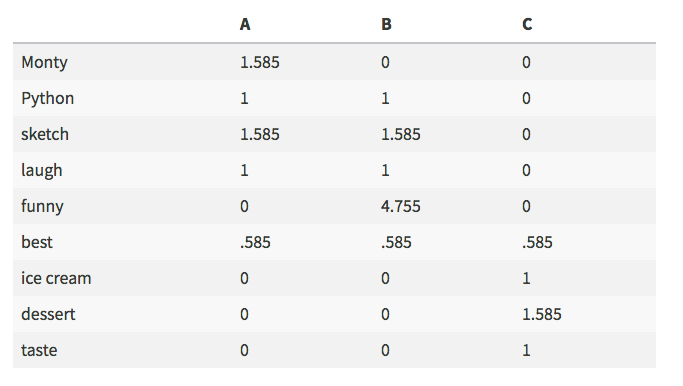


## Drill: Matrix multiplication and similarity
Why would multiplying the tfidf vectors of two sentences give information about how similar they are to one another? Try to figure it out by multiplying the vectors for sentence A with the other two sentences. Do it by hand, if you can- you'll be multiplying sentence A's tfidf score for ‘Monty’ with sentence B's tfidf score for ‘Monty’, for example. Which sentence does intuition tell you is most similar? Does the math bear it out?

Once you think you've figured out why the matrix multiplication results in a similarity score, write an explanation in your own words and discuss it with your mentor.







In [1]:
# Matrix multiplication for Monty in sentence A and B 
1.585*1.585 + 0*0

2.512225

In [2]:
# Matrix multiplcation for Python in sentence A and B
1*1 + 1*1

2

In [3]:
# Matrix multiplcation for Python in sentence A and C
1*1 + 0*0

1

** Not sure what this means ... How do these numbers explain similarity? **

### Matrix multiplcation for sentences A and B

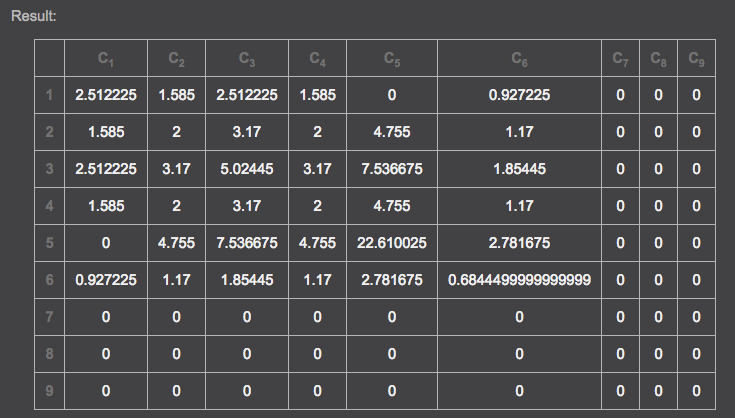

### Matrix multiplcation for sentences A and C
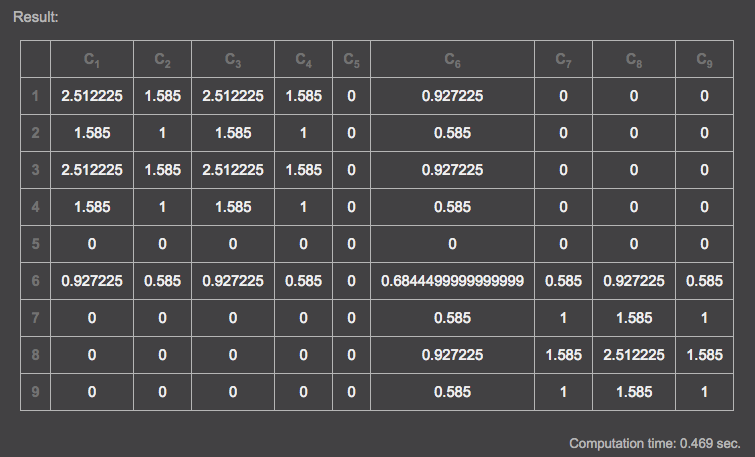

### Matrix multiplcation for sentences B and C
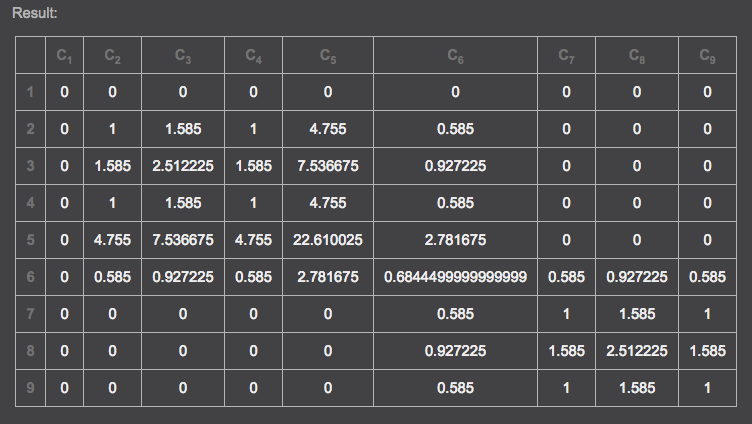

## Rank rather than mere similarity: Choosing sentences using TextRank

We could potentially stop here, by choosing the sentence with the highest mean or median similarity score to be our representative sentence. Sometimes this approach is just fine. However, this method is prone to bias. If a document has two instances of the same sentence, for example, they are going to have very high similarity scores compared to the scores of other sentences. This is fine if those two sentences are important, but if they are something generic such as 'Thank you very much,' then we're not going to find them very valuable as summaries.

What we really want is to find a sentence or sentences that are very similar to many other sentences that are themselves very similar to many other sentences: **The best sentence in a cluster of similar sentences.**

The algorithm we're going to use is called **[TextRank]**(https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf). At a conceptual level, the idea behind TextRank is that **a sentence's rank is determined by the number and the rank of the sentences that it is similar to.** A sentence that is highly similar to a few high-ranked sentences will have a higher TextRank than a sentence that is similar to a lot of low-ranked sentences.

The algorithm is iterative. Since each sentence's rank depends on the rank of other sentences, any adjustment in the rank of one sentence can result in adjustments to the rank of many other sentences. Iteration proceeds until the change in ranks falls below a user-provided threshold.

In addition, there is a **'damping' parameter.** This parameter keeps the calculation for the rank of an individual sentence from going on forever. The damping parameter represents the probability that the model will ‘jump’ to another sentence entirely and start over again. A damping parameter close to *1* means the model is *likely to only go a few sentences deep for its rank calculation before jumping to a new sentence and starting again.* A damping parameter close to *0* means the model will probably be able to *incorporate the ranks of a large number of sentences before jumping.*

The formula for the TextRank score for a sentence $V_i$ of a list of sentences $V$ requires the following information:

$d$: A damping factor: Traditionally set to .85

$Vj\epsilon V_i$: The set of sentences $V_j$ that have similarity scores > 0 with $V_i$.

$w{ji}$: The similarity of sentences $V_i$ and $V_j$.

$V_k\epsilon V_j$ The set of sentences $V_k$ that have similarity scores > 0 with $V_j$.

$R(V_j)$: The rank of sentence $V_j$.

$$Rank(Vi)=(1-d)+d\sum{Vj\epsilon V_i}\dfrac{w{ji}}{\sum\limits{V_k\epsilon V_j} w{jk}}R(V_j)$$

In words, the rank of sentence $V_i$ is calculated by:

1. The rank of sentence $V_j$ multiplied by:
2. The sum of the similarity scores ($w{ji}$) for all the sentences with sentence $V_i$, where each is each divided by the sum of the similarity scores ($w{jk}$) for all the sentences with sentence $V_k$.
3. This is multiplied by the damping factor $d$, and added to $(1-d)$.

## Keywords and co-occurrence

Another method of summarizing text is to **choose relevant keywords** that identify the central topics. Extracting keywords can be done **by similarity or by co-occurrence**: Words that appear frequently are likely to be useful keywords. Key phrases can be built by combining two frequently adjacent keywords.

Quantifying co-occurrence involves defining how close a word needs to be to another word to count as being ‘nearby’. This window can vary widely depending on the type of text. Many keyword extraction algorithms only use nouns and adjectives when searching for keywords, as these are more likely to contain descriptive information.

Once the ‘co-occurrence’ of words has been calculated, the TextRank algorithm can be used to identify the most important words.

## More extraction
We have focused on using similarity or co-occurrence information to identify important sentences, phrases, or words, but there are other methods. For example, news articles use an ‘inverted pyramid’ structure where the most important details are presented first. Knowing this, an algorithm summarizing news stories could use *sentence order* as an indicator of weight. Some *grammatical structures* may also be more likely to contain important information; **it all depends on the type of text you want to summarize.**

## Abstractive text summarization
The goal of abstractive text summarization is to **summarize like a human being.** Abstractive summaries are often *shorter than extractive ones, but are much more challenging to generate*. For example, here are examples of extractive and abstractive summaries of the opening sentence of A Tale of Two Cities by Charles Dickens:

“It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.”

Extractive: It was... like the present ...in the superlative degree of comparison. 

Abstractive: It was a time of contradictions.

**Abstractive methods rely on neural networks** to identify the core of a text and to produce a summary that reflects the core, *without necessarily using the same words* as in the original text. Abstractive text summarization is sufficiently complex and cutting-edge that it would require an entire course to do it justice.



# Guided Example - Text Summarization

In [4]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import networkx as nx
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

# Summarizing Text

Let's try out extractive summarization using the first four paragraphs of [The Great Gatsby](http://gutenberg.net.au/ebooks02/0200041h.html).

First, we'll try to extract the most representative sentence.  Then, we'll extract keywords.

## Sentence extraction

The steps of our sentence extraction process:

1. Parse and tokenize the text using spaCy, and divide into sentences.
2. Calculate the tf-idf matrix.
3. Calculate similarity scores.
4. Calculate TextRank: We're going to use the ´networkx´ package to run the TextRank algorithm.

Let's get started!


In [5]:
# Importing the text the lazy way.
gatsby="In my younger and more vulnerable years my father gave me some advice that I've been turning over in my mind ever since. \"Whenever you feel like criticizing any one,\" he told me, \"just remember that all the people in this world haven't had the advantages that you've had.\" He didn't say any more but we've always been unusually communicative in a reserved way, and I understood that he meant a great deal more than that. In consequence I'm inclined to reserve all judgments, a habit that has opened up many curious natures to me and also made me the victim of not a few veteran bores. The abnormal mind is quick to detect and attach itself to this quality when it appears in a normal person, and so it came about that in college I was unjustly accused of being a politician, because I was privy to the secret griefs of wild, unknown men. Most of the confidences were unsought--frequently I have feigned sleep, preoccupation, or a hostile levity when I realized by some unmistakable sign that an intimate revelation was quivering on the horizon--for the intimate revelations of young men or at least the terms in which they express them are usually plagiaristic and marred by obvious suppressions. Reserving judgments is a matter of infinite hope. I am still a little afraid of missing something if I forget that, as my father snobbishly suggested, and I snobbishly repeat a sense of the fundamental decencies is parcelled out unequally at birth. And, after boasting this way of my tolerance, I come to the admission that it has a limit. Conduct may be founded on the hard rock or the wet marshes but after a certain point I don't care what it's founded on. When I came back from the East last autumn I felt that I wanted the world to be in uniform and at a sort of moral attention forever; I wanted no more riotous excursions with privileged glimpses into the human heart. Only Gatsby, the man who gives his name to this book, was exempt from my reaction--Gatsby who represented everything for which I have an unaffected scorn. If personality is an unbroken series of successful gestures, then there was something gorgeous about him, some heightened sensitivity to the promises of life, as if he were related to one of those intricate machines that register earthquakes ten thousand miles away. This responsiveness had nothing to do with that flabby impressionability which is dignified under the name of the \"creative temperament\"--it was an extraordinary gift for hope, a romantic readiness such as I have never found in any other person and which it is not likely I shall ever find again. No--Gatsby turned out all right at the end; it is what preyed on Gatsby, what foul dust floated in the wake of his dreams that temporarily closed out my interest in the abortive sorrows and short-winded elations of men."

# We want to use the standard english-language parser.
parser = spacy.load('en')

# Parsing Gatsby.
gatsby = parser(gatsby)

# Dividing the text into sentences and storing them as a list of strings.
sentences=[]
for span in gatsby.sents:
    # go from the start to the end of each span, returning each token in the sentence
    # combine each token using join()
    sent = ''.join(gatsby[i].string for i in range(span.start, span.end)).strip()
    sentences.append(sent)

# Creating the tf-idf matrix.
counter = TfidfVectorizer(lowercase=False, 
                          stop_words=None,
                          ngram_range=(1, 1), 
                          analyzer=u'word', 
                          max_df=.5, 
                          min_df=1,
                          max_features=None, 
                          vocabulary=None, 
                          binary=False)

#Applying the vectorizer
data_counts=counter.fit_transform(sentences)

In [6]:
# Four pararaphs
gatsby


In my younger and more vulnerable years my father gave me some advice that I've been turning over in my mind ever since. "Whenever you feel like criticizing any one," he told me, "just remember that all the people in this world haven't had the advantages that you've had." He didn't say any more but we've always been unusually communicative in a reserved way, and I understood that he meant a great deal more than that. In consequence I'm inclined to reserve all judgments, a habit that has opened up many curious natures to me and also made me the victim of not a few veteran bores. The abnormal mind is quick to detect and attach itself to this quality when it appears in a normal person, and so it came about that in college I was unjustly accused of being a politician, because I was privy to the secret griefs of wild, unknown men. Most of the confidences were unsought--frequently I have feigned sleep, preoccupation, or a hostile levity when I realized by some unmistakable sign that an intim

In [7]:
# Broken out into 16 sentences
sentences


["In my younger and more vulnerable years my father gave me some advice that I've been turning over in my mind ever since.",
 '"Whenever you feel like criticizing any one," he told me, "just remember that all the people in this world haven\'t had the advantages that you\'ve had."',
 "He didn't say any more but we've always been unusually communicative in a reserved way, and I understood that he meant a great deal more than that.",
 "In consequence I'm inclined to reserve all judgments, a habit that has opened up many curious natures to me and also made me the victim of not a few veteran bores.",
 'The abnormal mind is quick to detect and attach itself to this quality when it appears in a normal person, and so it came about that in college',
 'I was unjustly accused of being a politician, because I was privy to the secret griefs of wild, unknown men.',
 'Most of the confidences were unsought--frequently I have feigned sleep, preoccupation, or a hostile levity when I realized by some unm

In [8]:
# tfidf matrix
print(data_counts)


  (0, 6)	0.2035966326529439
  (0, 158)	0.45597122894293224
  (0, 280)	0.23378433791489778
  (0, 157)	0.1821781149095979
  (0, 261)	0.23378433791489778
  (0, 277)	0.23378433791489778
  (0, 80)	0.2035966326529439
  (0, 97)	0.23378433791489778
  (0, 150)	0.1821781149095979
  (0, 219)	0.1821781149095979
  (0, 21)	0.23378433791489778
  (0, 258)	0.1821781149095979
  (0, 42)	0.2035966326529439
  (0, 244)	0.23378433791489778
  (0, 173)	0.23378433791489778
  (0, 122)	0.12180270438569019
  (0, 154)	0.2035966326529439
  (0, 74)	0.2035966326529439
  (0, 215)	0.23378433791489778
  (1, 150)	0.16479636303932857
  (1, 258)	0.16479636303932857
  (1, 122)	0.1101814161436287
  (1, 14)	0.21147879723670807
  (1, 278)	0.42295759447341613
  (1, 81)	0.21147879723670807
  :	:
  (15, 152)	0.1367431210214837
  (15, 167)	0.1367431210214837
  (15, 34)	0.12427301234387382
  (15, 172)	0.3056397744838155
  (15, 269)	0.3056397744838155
  (15, 3)	0.3056397744838155
  (15, 115)	0.15281988724190776
  (15, 8)	0.1754788165

## Similarity

We now have sentences represented as vectors, with each word having a score based on how often it occurs in the sentence divided by how often it occurs in the whole text.

Now let's calculate the similarity scores for the sentences and apply the TextRank algorithm.  Because TextRank is based on Google's PageRank algorithm, the function is called 'pagerank'.  The hyperparameters are the damping parameter ´alpha´ and the convergence parameter ´tol´.

In [9]:
# Calculating similarity
similarity = data_counts * data_counts.T

# Identifying the sentence with the highest rank.
nx_graph = nx.from_scipy_sparse_matrix(similarity)
ranks=nx.pagerank(nx_graph, alpha=.85, tol=.00000001)

ranked = sorted(((ranks[i],s) for i,s in enumerate(sentences)),
                reverse=True)
print(ranked[0])


(0.07478177112861596, 'This responsiveness had nothing to do with that flabby impressionability which is dignified under the name of the "creative temperament"--it was an extraordinary gift for hope, a romantic readiness such as I have never found in any other person and which it is not likely I shall ever find again.')


Since a lot of Gatsby is about the narrator acting as the observer of other peoples' sordid secrets, this seems pretty good.  Now, let's extract some keywords.

# Keyword summarization

1) Parse and tokenize text (already done).  
2) Filter out stopwords, choose only nouns and adjectives.  
3) Calculate the neighbors of words (we'll use a window of 4).  
4) Run TextRank on the neighbor matrix.  


In [10]:
# Removing stop words and punctuation, then getting a list of all unique words, 
# nouns and adjectives, in the text
gatsby_filt = [word for word in gatsby if word.is_stop==False 
               and (word.pos_=='NOUN' or word.pos_=='ADJ')]
words=set(gatsby_filt)

#Creating a grid indicating whether words are within 4 places of the target word
adjacency=pd.DataFrame(columns=words,index=words,data=0)

#Iterating through each word in the text and indicating which of the unique words are its neighbors
for i,word in enumerate(gatsby):
    # Checking if any of the word's next four neighbors are in the word list 
    if any([word == item for item in gatsby_filt]):
        # Making sure to stop at the end of the string, even if there are less than four words left after the target.
        end=max(0,len(gatsby)-(len(gatsby)-(i+5)))
        # The potential neighbors.
        nextwords=gatsby[i+1:end]
        # Filtering the neighbors to select only those in the word list
        inset=[x in gatsby_filt for x in nextwords]
        neighbors=[nextwords[i] for i in range(len(nextwords)) if inset[i]]
        # Adding 1 to the adjacency matrix for neighbors of the target word
        if neighbors:
            adjacency.loc[word,neighbors]=adjacency.loc[word,neighbors]+1

print('done!')
        



done!


In [11]:
# List of unique words
words


{younger,
 vulnerable,
 years,
 father,
 advice,
 mind,
 people,
 world,
 advantages,
 communicative,
 reserved,
 way,
 great,
 deal,
 consequence,
 inclined,
 judgments,
 habit,
 curious,
 natures,
 victim,
 veteran,
 bores,
 abnormal,
 mind,
 quick,
 quality,
 normal,
 person,
 college,
 politician,
 privy,
 secret,
 griefs,
 wild,
 unknown,
 men,
 Most,
 confidences,
 sleep,
 preoccupation,
 hostile,
 levity,
 unmistakable,
 sign,
 intimate,
 revelation,
 horizon,
 intimate,
 revelations,
 young,
 men,
 terms,
 plagiaristic,
 obvious,
 suppressions,
 Reserving,
 judgments,
 matter,
 infinite,
 hope,
 little,
 afraid,
 father,
 sense,
 fundamental,
 decencies,
 birth,
 way,
 tolerance,
 admission,
 limit,
 Conduct,
 hard,
 rock,
 wet,
 marshes,
 certain,
 point,
 autumn,
 world,
 uniform,
 sort,
 moral,
 attention,
 riotous,
 excursions,
 privileged,
 glimpses,
 human,
 heart,
 man,
 book,
 exempt,
 reaction,
 unaffected,
 scorn,
 personality,
 unbroken,
 series,
 successful,
 gestur

In [12]:
adjacency


,unmistakable,readiness,life,foul,young,intimate,book,mind,terms,series,...,quick,world,admission,father,vulnerable,end,men,suppressions,miles,gift
unmistakable,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
readiness,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
life,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
foul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
young,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
intimate,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
book,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mind,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
terms,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
series,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Running TextRank
nx_words = nx.from_numpy_matrix(adjacency.as_matrix())
ranks=nx.pagerank(nx_words, alpha=.85, tol=.00000001)

# Identifying the five most highly ranked keywords
ranked = sorted(((ranks[i],s) for i,s in enumerate(words)),
                reverse=True)
print(ranked[:5])


[(0.013370948308795436, hope), (0.012223431176324349, promises), (0.012223431176324349, exempt), (0.012142068850548906, glimpses), (0.011895137937387881, intimate)]


These results are less impressive.  'Hope', 'promises', and 'glimpses' certainly fit the elegiac, on-the-outside-looking-in tone of the book, but 'exempt' and 'world' are pretty generic.  TextRank may perform better on a larger text sample.

# Drill

It is also possible that keyword phrases will work better.  Modfiy the keyword extraction code to extract two-word phrases (digrams) rather than single words.  Then try it with trigrams.  You will probably want to broaden the window that defines 'neighbors.'  Try a few different modifications, and write up your observations in your notebook.  Discuss with your mentor.

In [27]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import RegexpTokenizer

gatsby_string="In my younger and more vulnerable years my father gave me some advice that I've been turning over in my mind ever since. \"Whenever you feel like criticizing any one,\" he told me, \"just remember that all the people in this world haven't had the advantages that you've had.\" He didn't say any more but we've always been unusually communicative in a reserved way, and I understood that he meant a great deal more than that. In consequence I'm inclined to reserve all judgments, a habit that has opened up many curious natures to me and also made me the victim of not a few veteran bores. The abnormal mind is quick to detect and attach itself to this quality when it appears in a normal person, and so it came about that in college I was unjustly accused of being a politician, because I was privy to the secret griefs of wild, unknown men. Most of the confidences were unsought--frequently I have feigned sleep, preoccupation, or a hostile levity when I realized by some unmistakable sign that an intimate revelation was quivering on the horizon--for the intimate revelations of young men or at least the terms in which they express them are usually plagiaristic and marred by obvious suppressions. Reserving judgments is a matter of infinite hope. I am still a little afraid of missing something if I forget that, as my father snobbishly suggested, and I snobbishly repeat a sense of the fundamental decencies is parcelled out unequally at birth. And, after boasting this way of my tolerance, I come to the admission that it has a limit. Conduct may be founded on the hard rock or the wet marshes but after a certain point I don't care what it's founded on. When I came back from the East last autumn I felt that I wanted the world to be in uniform and at a sort of moral attention forever; I wanted no more riotous excursions with privileged glimpses into the human heart. Only Gatsby, the man who gives his name to this book, was exempt from my reaction--Gatsby who represented everything for which I have an unaffected scorn. If personality is an unbroken series of successful gestures, then there was something gorgeous about him, some heightened sensitivity to the promises of life, as if he were related to one of those intricate machines that register earthquakes ten thousand miles away. This responsiveness had nothing to do with that flabby impressionability which is dignified under the name of the \"creative temperament\"--it was an extraordinary gift for hope, a romantic readiness such as I have never found in any other person and which it is not likely I shall ever find again. No--Gatsby turned out all right at the end; it is what preyed on Gatsby, what foul dust floated in the wake of his dreams that temporarily closed out my interest in the abortive sorrows and short-winded elations of men."

# Getting rid of punctuations
tokenizer = RegexpTokenizer(r'\w+')
gatsby2 = tokenizer.tokenize(gatsby_string)

# Converting into bygrams
gatsby_bigrams = [b for b in nltk.bigrams(gatsby2)]

In [28]:
gatsby_bigrams

[('In', 'my'),
 ('my', 'younger'),
 ('younger', 'and'),
 ('and', 'more'),
 ('more', 'vulnerable'),
 ('vulnerable', 'years'),
 ('years', 'my'),
 ('my', 'father'),
 ('father', 'gave'),
 ('gave', 'me'),
 ('me', 'some'),
 ('some', 'advice'),
 ('advice', 'that'),
 ('that', 'I'),
 ('I', 've'),
 ('ve', 'been'),
 ('been', 'turning'),
 ('turning', 'over'),
 ('over', 'in'),
 ('in', 'my'),
 ('my', 'mind'),
 ('mind', 'ever'),
 ('ever', 'since'),
 ('since', 'Whenever'),
 ('Whenever', 'you'),
 ('you', 'feel'),
 ('feel', 'like'),
 ('like', 'criticizing'),
 ('criticizing', 'any'),
 ('any', 'one'),
 ('one', 'he'),
 ('he', 'told'),
 ('told', 'me'),
 ('me', 'just'),
 ('just', 'remember'),
 ('remember', 'that'),
 ('that', 'all'),
 ('all', 'the'),
 ('the', 'people'),
 ('people', 'in'),
 ('in', 'this'),
 ('this', 'world'),
 ('world', 'haven'),
 ('haven', 't'),
 ('t', 'had'),
 ('had', 'the'),
 ('the', 'advantages'),
 ('advantages', 'that'),
 ('that', 'you'),
 ('you', 've'),
 ('ve', 'had'),
 ('had', 'He'),
 (

In [30]:
bigrams = set(gatsby_bigrams)

#Creating a grid indicating whether words are within 4 places of the target word
adjacency=pd.DataFrame(columns=bigrams,index=bigrams,data=0)

#Iterating through each word in the text and indicating which of the unique words are its neighbors
for i,bigram in enumerate(gatsby):
    # Checking if any of the word's next four neighbors are in the word list 
    if any([bigram == item for item in gatsby_bigrams]):
        # Making sure to stop at the end of the string, even if there are less than four words left after the target.
        end=max(0,len(gatsby)-(len(gatsby)-(i+5)))
        # The potential neighbors.
        nextphrase=gatsby[i+1:end]
        # Filtering the neighbors to select only those in the word list
        inset=[x in gatsby_bigrams for x in nextphrase]
        neighbors=[nextphrase[i] for i in range(len(nextphrase)) if inset[i]]
        # Adding 1 to the adjacency matrix for neighbors of the target word
        if neighbors:
            adjacency.loc[bigram,neighbors]=adjacency.loc[bigram,neighbors]+1

print('done!')




TypeError: Argument 'other' has incorrect type (expected spacy.tokens.token.Token, got tuple)

In [31]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Lesson 4: Advanced Text Extraction

# What is in a topic?  The problem of interpretability.

A problem with LSA is that the link between words and topics isn't very clear.  Some words will have high positive loadings on a component, while other words will have high negative loadings on a component.  It's easy to understand that a high positive loading means that those words are highly relevant to the topic represented by that component.  But what does a high negative loading mean?  Is the topic linked to the opposite of the negative words in some way?  This lack of clarity can make it hard to understand exactly what topic a component represents.

Here is an example, drawn from the LSA lesson.  We take Emma by Jane Austen, parse it, convert it to a tf-idf matrix, then run a PCA on it (using the TruncatedSVD command so that it won't center the data and remove sparsity).  Then we'll  look at the relationship between a few words and the set of topics/components.

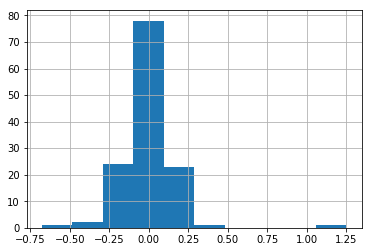

In [32]:
from nltk.corpus import gutenberg
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


#reading in the data, this time in the form of paragraphs
emma=gutenberg.paras('austen-emma.txt')
#processing
emma_paras=[]
for paragraph in emma:
    para=paragraph[0]
    #removing the double-dash from all words
    para=[re.sub(r'--','',word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    emma_paras.append(' '.join(para))

# Creating the tf-idf matrix.
vectorizer = TfidfVectorizer()
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)

# Generating 130 topics.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
emma_paras_lsa = lsa.fit_transform(emma_paras_tfidf)

# Getting the word list.
terms = vectorizer.get_feature_names()

# Loading scores for each word on each topic/component.
words_by_topic=emma_paras_tfidf.T * emma_paras_lsa

# Linking the loadings to the words in an easy-to-read way.
components=pd.DataFrame(words_by_topic,index=terms)

components.loc['marriage'].hist()
plt.show()


# LSA and words

As shown above, the word 'marriage' features in several topics (the parts of the histogram where the loading is not zero).  What does that mean?  Are topics with negative loadings for 'marriage' topics having to do with the opposite of  marriage (such as divorce), or are they just totally unrelated to marriage (such as turnips)?   There's no way to know without examining every topic individually.  

The point of this is to show that **LSA is useful as a data reduction tool, but if you want to be able to understand how the topics relate to the words in your corpus, it is not the best technique because of its use of negative loadings.**  Unfortunately, negative loadings are an inherent part of PCA.  Fortunately, there are other methods better suited to dealing with sparse, non-negative matrices.

# Topic modeling with LSA variants

## Probabilistic LSA

In LSA, the goal is to reproduce the tf-idf matrix using a smaller set of components, which we then call 'topics.'  A modification, *probabilistic* LSA (pLSA, also called probabilistic Latent Semantic Indexing, or pLSI) approaches the problem in the opposite direction.  **pLSA begins by assuming the existence of a set of topics, that set being unknown at the start (hidden variables that are believed to influence the data are called *latent* variables).  A document that contains a topic will have a high probability of containing some words (related to the topic), and a low probability of containing other words (unrelated to the topic).  Documents also have a probability of featuring each topic, low for some topics and high for others.**

In equation form, we are saying that the probability of a word $w$ appearing in a given document $d$ is a function of the  probability of a word occurring given a topic $t$ times the probabiltiy of a topic occurring given that document, summed across topics, times the probability of the given document.

$$P(d,w)=P(d)\sum_t P(w|t)P(t|d)$$

Now, the nice thing is that we can easily calculate $P(d,w)$ and $P(d)$.  The probability of a word occurring in a document is the number of times the word appears in the document divided by the total number of words in the document.  the probability of a document, in turn, is the inverse of the number of documents in our corpus.  

Having those things, we can then look for topics/word/document combinations that maximize the likelihood of getting the arrangement of documents and words that we observe in our data.  This idea of *maximizing likelihood* is also called **expectation maximization**.  It is an iterative process where each iteration has two steps.  In the first step (called the *E* step), the algorithm proposes a probability distribution for the topics based on the current model.  In the second step (the *M* step), the model parameters are re-estimated on the basis of the new probability distribution.    

(Confusing?  Basically, we start by proposing a set of topics, then look at how likely the data we have would be given those topics.  Then we adjust our model based on what we learn, leading to new topics.  This is the opposite of LSA, where we start with the data and solve for a set of component-topics.)

Iteration continues until the model reaches stopping conditions as defined by hyperparameters.  The most common stopping condition is when the change in the logged likelihood of the data between two iterations falls below a certain threshold.

Like other algorithms based on iteration, such as gradient descent, *EM* solutions may not always converge on gloablly optimal parameter estimates.  Varying the starting parameter estimates can help to avoid this problem- if the model converges to similar or identical parameter estimates given different sets of starting parameters, the solution is more likely to be globally optimal.

pLSA solves for a unique topic distribution for each document ($P(t|d)$).  This leads to some drawbacks:

* the number of parameters increases linearly with the number of documents
* high risk of overfitting 
* model does not generalize to new documents, only those in the corpus at the time the  model is fitted

## Latent Dirichlet Allocation (LDA)

Latent Dirichlet Allocation is a Bayesian implementation of pLSA that includes sparse Dirichlet priors for estimating the probability that a topic will be in a document ($P(t|d)$) and the probability that a word will be in a topic ($P(w|t)$).  Let's break that down:

* The sparsity element is important because it tells the model that each document should be composed of only a few topics (with all other topic probabilities set to 0), and each topic should be composed of only a few words that are used frequently.  

* The 'Dirichlet' indicates that the distribution is continuous, multivariate, and bounded at 0 and 1 (so it represents probabilities).  

* The 'prior' gives information about the suspected likelihood of potential values for the parameters.  In pLSA, all potential values for $P(t|d)$ and $P(w|t)$ are considered equally likely because there is no prior.  

LDA is computationally intensive to model, but can be more accurate than pLSA, with less proneness to overfitting.  The model also generalizes to new documents, and so is useful in a situation where the corpus is expected to expand with time.


# Topic modeling with Non-Negative Matrix Factorization

Latent variables are all very nice, but the need to model such a large number of unknowns makes methods like pLSA and LDA computationally unwieldy.  What if we could have the elegant simplicity of PCA but without the hassle of uninterpretable negative loadings?  That's where **Non-Negative Matrix Factorization** (NNMF) comes in.

Like PCA, NNMF is searching for two matrices that, when multiplied together, result in the original data matrix- in this case, the tf-idf matrix.  

Unlike PCA, however, in NNMF we apply the constraint that all three matrices (the original and the two new ones) must contain no negative values.  This constraint is why we say that $WH$ will be approximately equal ($\approx$) rather than exactly equal ($=$):

$$tfidf \approx WH$$

In text modeling, $W$ represents the topics, and $H$ describes whether, and to what extent, each topic applies to each document.

There are a number of different way to fit an NNMF model.  Generally, the aim is to minimize the cost function $tfidf-WH$, that is, to find values for $W$ and $H$ that result in a matrix as close to $tfidf$ as possible.  Minimization occurs by iteration.  Many different iteration approaches can be used- ´sklearn´ implements NNMF with a coordinate descent algorithm.  

In coordinate descent, different elements of the equation are optimized in turn.  Since NNMF is trying to optimize two matrices ($W$ and $H$), a coordinate descent implementation alternates updating $W$ and $H$.  In each update, new values are chosen that shrink the cost function relative to the previous values.  This approach is reminiscent of gradient descent, which we encountered in an earlier lesson.

Like other iterative models, NNMF carries the risk of converging on a local, rather than global, minimum.  Different combinations of starting values can be tried to test whether the solution is likely to be global.  A strength of NNMF is that the solution is not only interpretable, but sparse-- most documents are linked to only a few topics, and most topics are linked to only a few words.
